In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import keras as kr
import random 
import preprocessor
import base_preprocessor
import operator
import lightgbm as lgb
import statsmodels.api as sm
from preprocessor import prepare_data, get_features, get_bounds, get_interval_accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, Lasso
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
import keras.callbacks as cb
from lightgbm import LGBMRegressor
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.optimizers import Adam

# Load in pre-split data for data including feature engineering
X_train, X_test, y_train, y_test = prepare_data()
features = get_features()
train_bounds_5 = get_bounds(y_train, 5)
train_bounds_10 = get_bounds(y_train, 10)
test_bounds_5 = get_bounds(y_test, 5)
test_bounds_10 = get_bounds(y_test, 10)

# Load in pre-split data for original data
# X_train, X_test, y_train, y_test = base_preprocessor.prepare_data()
# features = base_preprocessor.get_features()

Duplicate key in file '/Users/hannahstoik/.matplotlib/matplotlibrc' line #2.
Duplicate key in file '/Users/hannahstoik/.matplotlib/matplotlibrc' line #3.
Using TensorFlow backend.


Train data(range):
2019-04-11 21:49:48
2019-06-18 23:27:30
Test data(range):
2019-06-18 23:27:49
2019-08-22 19:05:30


### Linear Regression

In [2]:
# Linear Regression model (without regularization)
lm = LinearRegression()
lm.fit(X_train, y_train)

# Compute predictions
y_pred_train_lm = lm.predict(X_train)
y_pred_test_lm = lm.predict(X_test)

# Compute metrics
MSE = mean_squared_error(y_train, y_pred_train_lm)
r2 = r2_score(y_train, y_pred_train_lm)

print("Train Scores:")
print(MSE)
print(r2)

MSE = mean_squared_error(y_test, y_pred_test_lm)
r2 = r2_score(y_test, y_pred_test_lm)

print("Test Scores:")
print(MSE)
print(r2)

coef_df = pd.DataFrame(lm.coef_[0], features, columns=['Coefficient'])
coef_df

Train Scores:
105.05221504125
0.8454322450051832
Test Scores:
102.44860032437498
0.8091248739210846


,Coefficient
travel_mins,-3.776501e+01
originpop,-2.069904e+14
destinationpop,-5.778964e+13
days_to_holiday,1.753654e+00
days_from_holiday,-3.673627e+00
distance,-1.426012e+14
month,7.443292e-01
date,1.333456e+00
hour,6.793476e-01
minute,-2.638493e+00


In [6]:
print(np.mean(get_interval_accuracy_score(train_bounds_5, y_pred_train_lm)))
print(np.mean(get_interval_accuracy_score(test_bounds_5, y_pred_test_lm)))

0.301125
0.26465


In [4]:
# Linear Regression model (with Ridge Regression)
rr = Ridge(alpha=0.06)
rr.fit(X_train, y_train)

# Compute predictions
y_pred_train_rr = rr.predict(X_train)
y_pred_test_rr = rr.predict(X_test)

# Compute metrics
MSE = mean_squared_error(y_train, y_pred_train_rr)
r2 = r2_score(y_train, y_pred_train_rr)

print("Train Scores:")
print(MSE)
print(r2)

MSE = mean_squared_error(y_test, y_pred_test_rr)
r2 = r2_score(y_test, y_pred_test_rr)

print("Test Scores:")
print(MSE)
print(r2)

coef_df = pd.DataFrame(rr.coef_[0], features, columns=['Coefficient'])
coef_df

Train Scores:
104.67498515214622
0.8459872792522272
Test Scores:
103.0066175920417
0.8080852148531924


,Coefficient
travel_mins,-37.769992
originpop,7.593008
destinationpop,8.094993
days_to_holiday,1.506199
days_from_holiday,-3.572358
distance,20.980484
month,1.285292
date,1.673992
hour,0.585658
minute,-2.887950


In [8]:
print(np.mean(get_interval_accuracy_score(train_bounds_5, y_pred_train_rr)))
print(np.mean(get_interval_accuracy_score(test_bounds_5, y_pred_test_rr)))

0.304125
0.26685


In [10]:
# Linear Regression model (with Lasso)
lso = Lasso(alpha=0.1, tol=0.001)
lso.fit(X_train, y_train)

# Compute predictions
y_pred_train_lso = lso.predict(X_train)
y_pred_test_lso = lso.predict(X_test)

# Compute metrics
MSE = mean_squared_error(y_train, y_pred_train_lso)
r2 = r2_score(y_train, y_pred_train_lso)

print("Train Scores:")
print(MSE)
print(r2)

MSE = mean_squared_error(y_test, y_pred_test_lso)
r2 = r2_score(y_test, y_pred_test_lso)

print("Test Scores:")
print(MSE)
print(r2)

coef_df = pd.DataFrame(lso.coef_, features, columns=['Coefficient'])
coef_df

Train Scores:
113.01604028110386
0.8337147330230521
Test Scores:
105.50720958809092
0.8034262852923533


,Coefficient
travel_mins,-19.017405
originpop,0.287253
destinationpop,0.000000
days_to_holiday,0.000000
days_from_holiday,-1.332196
distance,24.757987
month,-0.000000
date,0.321235
hour,0.000000
minute,-1.352165


In [11]:
print(np.mean(get_interval_accuracy_score(train_bounds_5, y_pred_train_lso)))
print(np.mean(get_interval_accuracy_score(test_bounds_5, y_pred_test_lso)))

0.293275
0.27225


### Random Forest Regression

In [15]:
y_train = list(np.array(y_train).flatten())
y_test = list(np.array(y_test).flatten())

In [16]:
rf_10 = RandomForestRegressor(n_estimators=10)
rf_50 = RandomForestRegressor(n_estimators=50)
rf_75 = RandomForestRegressor(n_estimators=75)
rf_100 = RandomForestRegressor(n_estimators=100)
rf_125 = RandomForestRegressor(n_estimators=125)
rf_150 = RandomForestRegressor(n_estimators=150)
rf_200 = RandomForestRegressor(n_estimators=200)
rf_250 = RandomForestRegressor(n_estimators=250)
rf_300 = RandomForestRegressor(n_estimators=300)

In [17]:
rf_10.fit(X_train, y_train)
rf_50.fit(X_train, y_train)
rf_75.fit(X_train, y_train)
rf_100.fit(X_train, y_train)
rf_125.fit(X_train, y_train)
rf_150.fit(X_train, y_train)
rf_200.fit(X_train, y_train)
rf_250.fit(X_train, y_train)
rf_300.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [18]:
rf_10_preds_train = rf_10.predict(X_train)
rf_50_preds_train = rf_50.predict(X_train)
rf_75_preds_train = rf_75.predict(X_train)
rf_100_preds_train = rf_100.predict(X_train)
rf_125_preds_train = rf_125.predict(X_train)
rf_150_preds_train = rf_150.predict(X_train)
rf_200_preds_train = rf_200.predict(X_train)
rf_250_preds_train = rf_250.predict(X_train)
rf_300_preds_train = rf_300.predict(X_train)
rf_10_preds_test = rf_10.predict(X_test)
rf_50_preds_test = rf_50.predict(X_test)
rf_75_preds_test = rf_75.predict(X_test)
rf_100_preds_test = rf_100.predict(X_test)
rf_125_preds_test = rf_125.predict(X_test)
rf_150_preds_test = rf_150.predict(X_test)
rf_200_preds_test = rf_200.predict(X_test)
rf_250_preds_test = rf_250.predict(X_test)
rf_300_preds_test = rf_300.predict(X_test)
rf_10_MSE_train = mean_squared_error(y_train, rf_10_preds_train)
rf_50_MSE_train = mean_squared_error(y_train, rf_50_preds_train)
rf_75_MSE_train = mean_squared_error(y_train, rf_75_preds_train)
rf_100_MSE_train = mean_squared_error(y_train, rf_100_preds_train)
rf_125_MSE_train = mean_squared_error(y_train, rf_125_preds_train)
rf_150_MSE_train = mean_squared_error(y_train, rf_150_preds_train)
rf_200_MSE_train = mean_squared_error(y_train, rf_200_preds_train)
rf_250_MSE_train = mean_squared_error(y_train, rf_250_preds_train)
rf_300_MSE_train = mean_squared_error(y_train, rf_300_preds_train)
rf_10_MSE_test = mean_squared_error(y_test, rf_10_preds_test)
rf_50_MSE_test = mean_squared_error(y_test, rf_50_preds_test)
rf_75_MSE_test = mean_squared_error(y_test, rf_75_preds_test)
rf_100_MSE_test = mean_squared_error(y_test, rf_100_preds_test)
rf_125_MSE_test = mean_squared_error(y_test, rf_125_preds_test)
rf_150_MSE_test = mean_squared_error(y_test, rf_150_preds_test)
rf_200_MSE_test = mean_squared_error(y_test, rf_200_preds_test)
rf_250_MSE_test = mean_squared_error(y_test, rf_250_preds_test)
rf_300_MSE_test = mean_squared_error(y_test, rf_300_preds_test)
rf_MSE_train = [rf_10_MSE_train, rf_50_MSE_train, rf_75_MSE_train, rf_100_MSE_train, rf_125_MSE_train,\
                rf_150_MSE_train, rf_200_MSE_train, rf_250_MSE_train, rf_300_MSE_train]
rf_MSE_test = [rf_10_MSE_test, rf_50_MSE_test, rf_75_MSE_test, rf_100_MSE_test, rf_125_MSE_test, \
              rf_150_MSE_test, rf_200_MSE_test, rf_250_MSE_test, rf_300_MSE_test]
print(rf_MSE_train)
print(rf_MSE_test)

[3.1759910129981104, 2.3382530945318383, 2.2908703044698497, 2.258037227732536, 2.2291682207859806, 2.225761710808136, 2.189076048998088, 2.1774798547969616, 2.1718897277572866]
[93.46943046383501, 87.01742996816431, 85.04474466655937, 85.31780214029607, 86.26877357559614, 86.37479852170158, 85.76503955876763, 87.34795349726959, 86.75467155142822]


In [ ]:
print(np.mean(get_interval_accuracy_score(train_bounds_5, rf_250_preds_train)))
print(np.mean(get_interval_accuracy_score(test_bounds_5, rf_250_preds_test)))

In [ ]:
rf_50_max = RandomForestRegressor(n_estimators=50, max_depth=15)
rf_100_max = RandomForestRegressor(n_estimators=100, max_depth=15)
rf_150_max = RandomForestRegressor(n_estimators=150, max_depth=15)
rf_200_max = RandomForestRegressor(n_estimators=200, max_depth=15)
rf_250_max = RandomForestRegressor(n_estimators=250, max_depth=15)
rf_300_max = RandomForestRegressor(n_estimators=300, max_depth=15)
rf_50_max.fit(X_train, y_train)
rf_100_max.fit(X_train, y_train)
rf_150_max.fit(X_train, y_train)
rf_200_max.fit(X_train, y_train)
rf_250_max.fit(X_train, y_train)
rf_300_max.fit(X_train, y_train)

In [ ]:
rf_50_max_preds_train = rf_50_max.predict(X_train)
rf_50_max_preds_test = rf_50_max.predict(X_test)
rf_100_max_preds_train = rf_100_max.predict(X_train)
rf_100_max_preds_test = rf_100_max.predict(X_test)
rf_150_max_preds_train = rf_150_max.predict(X_train)
rf_150_max_preds_test = rf_150_max.predict(X_test)
rf_200_max_preds_train = rf_200_max.predict(X_train)
rf_200_max_preds_test = rf_200_max.predict(X_test)
rf_250_max_preds_train = rf_250_max.predict(X_train)
rf_250_max_preds_test = rf_250_max.predict(X_test)
rf_300_max_preds_train = rf_300_max.predict(X_train)
rf_300_max_preds_test = rf_300_max.predict(X_test)
rf_50_max_MSE_train = mean_squared_error(y_train, rf_50_max_preds_train)
rf_50_max_MSE_test = mean_squared_error(y_test, rf_50_max_preds_test)
rf_100_max_MSE_train = mean_squared_error(y_train, rf_100_max_preds_train)
rf_100_max_MSE_test = mean_squared_error(y_test, rf_100_max_preds_test)
rf_150_max_MSE_train = mean_squared_error(y_train, rf_150_max_preds_train)
rf_150_max_MSE_test = mean_squared_error(y_test, rf_150_max_preds_test)
rf_200_max_MSE_train = mean_squared_error(y_train, rf_200_max_preds_train)
rf_200_max_MSE_test = mean_squared_error(y_test, rf_200_max_preds_test)
rf_250_max_MSE_train = mean_squared_error(y_train, rf_250_max_preds_train)
rf_250_max_MSE_test = mean_squared_error(y_test, rf_250_max_preds_test)
rf_300_max_MSE_train = mean_squared_error(y_train, rf_300_max_preds_train)
rf_300_max_MSE_test = mean_squared_error(y_test, rf_300_max_preds_test)
rf_max_MSE_train = [rf_50_max_MSE_train, rf_100_max_MSE_train, rf_150_max_MSE_train, rf_200_max_MSE_train,\
                    rf_250_max_MSE_train, rf_300_max_MSE_train]
rf_max_MSE_test = [rf_50_max_MSE_test, rf_100_max_MSE_test, rf_150_max_MSE_test, rf_200_max_MSE_test, \
                  rf_250_max_MSE_test, rf_300_max_MSE_test]
print(rf_max_MSE_train)
print(rf_max_MSE_test)

### Gradient Boosting

In [59]:
model = GradientBoostingRegressor(n_estimators=500, max_depth=8, loss='ls', min_samples_split=2, learning_rate=0.01)

In [60]:
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(mean_squared_error(y_test, model.predict(X_test)))

0.7200541227792195

In [49]:
test_score = np.zeros((500,), dtype=np.float64)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test, y_pred)

Text(0, 0.5, 'Deviance')

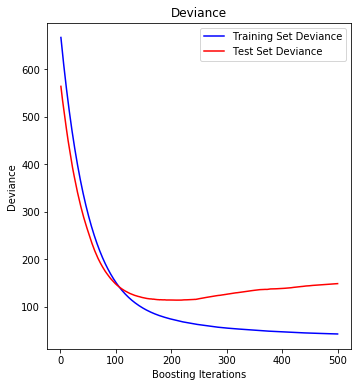

In [50]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(500) + 1, model.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(500) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

Text(0.5, 1.0, 'Gradient Boost Actual vs. Predicted Values')

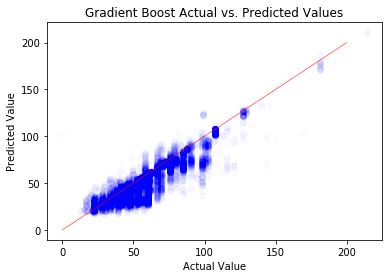

In [39]:
y_preds_train_gb = model.predict(X_train)
y_preds_test_gb = model.predict(X_test)
plt.plot(y_test, y_preds_test_gb, 'bo', alpha = 0.01)
plt.plot([0, 200], [0, 200], color = 'red', linewidth = 0.5)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Gradient Boost Actual vs. Predicted Values")

In [62]:
print(np.mean(get_interval_accuracy_score(train_bounds_5, y_pred_train_gb)))
print(np.mean(get_interval_accuracy_score(test_bounds_5, y_pred_test_gb)))

0.7236375
0.4835


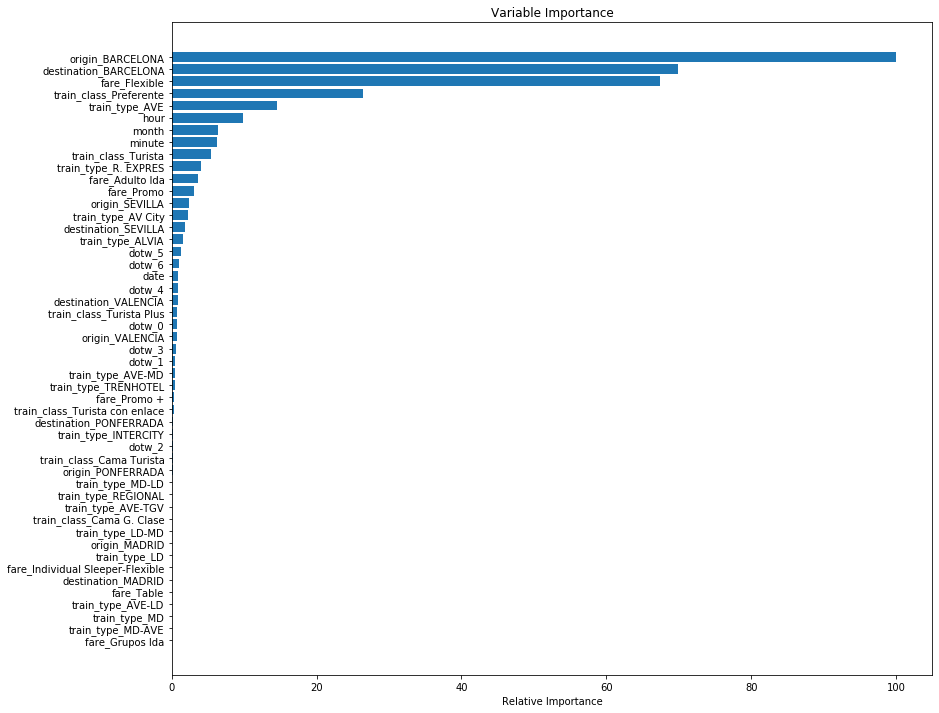

In [44]:
indices = np.array(list(range(len(features))))
features = np.array(features)[indices.astype(int)]
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(30, 12))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, features[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Neural Networks

In [82]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

def base_model():
    model = Sequential()
    model.add(Dense(10, input_dim = 49, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))
    adam = Adam()
    # Compile
    model.compile(loss = 'mean_squared_error', optimizer=adam, metrics =['mean_squared_error'])
    return model

def run_network(xtrain, xtest, ytrain, ytest, model, epochs, batch):
    model.fit(xtrain, ytrain, nb_epoch = epochs, batch_size = batch,
              validation_data = (xtest, ytest),verbose = 2)
    return model

# Change the number of layers but hold the number of hidden neurons constant
def change_layers_neurons(numlayers, numneurons):
    model = Sequential()
    model.add(Dense(numneurons, input_dim = 49, kernel_initializer = 'normal', activation = 'relu'))
    for x in range(1- numlayers):
        model.add(Dense(numneurons, kernel_initializer = 'normal', activation = 'relu'))
#        if x in (3, 7, 11):
#            model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))
    adam = Adam()
    model.compile(loss = 'mean_squared_error', optimizer=adam, metrics =['mean_squared_error'])
    return model
#
#def changenumneurons(numneurons):
#    model = Sequential()
#    model.add(Dense(numneurons, input_dim = 57, kernel_initializer = 'normal', activation = 'relu'))
#    model.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))
#    adam = Adam()
#    model.compile(loss = 'mean_squared_error', optimizer=adam, metrics =['mean_squared_error'])
#    return model

basemodel = base_model()
basemodel.summary()

# Run Network for Base Model
run_network(X_train, X_test, y_train, y_test, basemodel, 10,20)
# loss: 71.4160 - mean_squared_error: 71.4160 - val_loss: 87.4430 - val_mean_squared_error: 87.4430


# Create more networks hold number of neurons/layer constant
 
# 5 layers

model1 = change_layers_neurons(5, 10)
run_network(X_train, X_test, y_train, y_test, model1, 10,20)
run_network(X_train, X_test, y_train, y_test, model1, 10,3)
#  loss: 90.4071 - mean_squared_error: 90.4070 - val_loss: 103.8374 - val_mean_squared_error: 103.8374
#loss: 76.7292 - mean_squared_error: 76.7292 - val_loss: 91.1591 - val_mean_squared_error: 91.1588

# 10 layers
model2 = change_layers_neurons(10, 10)
run_network(X_train, X_test, y_train, y_test, model2, 10,20)
# loss: 86.6922 - mean_squared_error: 86.6923 - val_loss: 96.1824 - val_mean_squared_error: 96.1825


# 15 layers

model3 = change_layers_neurons(15, 10)
run_network(X_train, X_test, y_train, y_test, model3, 10,20)
# loss: 86.0480 - mean_squared_error: 86.0479 - val_loss: 90.0093 - val_mean_squared_error: 90.0093

# 25 layers

model4 = change_layers_neurons(25, 10)
run_network(X_train, X_test, y_train, y_test, model3, 10,20)
# loss: 82.1912 - mean_squared_error: 82.1912 - val_loss: 95.2062 - val_mean_squared_error: 95.2062

# Create layers with more neurons, hold number of layers constant

# 15 neurons
model5 = change_layers_neurons(3, 15)
run_network(X_train, X_test, y_train, y_test, model5, 10,20)

# 20 neurons
model6 = change_layers_neurons(3, 20)
run_network(X_train, X_test, y_train, y_test, model6, 10,20)

# 30 neurons
model7 = change_layers_neurons(3, 30)
run_network(X_train, X_test, y_train, y_test, model7, 10,20)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


c:\users\bicaj\documents\graduate courses\ds 5220 - supervised machine learning\project\venv\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 80000 samples, validate on 20000 samples
Epoch 1/10
 - 3s - loss: 666.9229 - mean_squared_error: 666.9228 - val_loss: 111.8495 - val_mean_squared_error: 111.8496
Epoch 2/10
 - 3s - loss: 114.8226 - mean_squared_error: 114.8227 - val_loss: 106.9728 - val_mean_squared_error: 106.9728
Epoch 3/10
 - 3s - loss: 111.9244 - mean_squared_error: 111.9242 - val_loss: 108.2515 - val_mean_squared_error: 108.2515
Epoch 4/10
 - 3s - loss: 111.6664 - mean_squared_error: 111.6663 - val_loss: 108.8199 - val_mean_squared_error: 108.8199
Epoch 5/10
 - 3s - loss: 111.5626 - mean_squared_error: 111.5628 - val_loss: 110.4063 - val_mean_squared_error: 110.4063
Epoch 6/10
 - 3s - loss: 111.5507 - mean_squared_error: 111.5506 - val_loss: 106.8828 - val_mean_squared_error: 106.8827
Epoch 7/10
 - 3s - loss: 111.5254 - mean_squared_error: 111.5255 - val_loss: 107.7368 - val_mean_squared_error: 107.7368
Epoch 8/10
 - 3s - loss: 111.4808 - mean_squared_error: 111.4809 - val_loss: 107.4411 - val_mean_square

Epoch 6/10
 - 4s - loss: 101.9622 - mean_squared_error: 101.9623 - val_loss: 104.6365 - val_mean_squared_error: 104.6366
Epoch 7/10
 - 4s - loss: 101.0523 - mean_squared_error: 101.0524 - val_loss: 100.5622 - val_mean_squared_error: 100.5622
Epoch 8/10
 - 4s - loss: 100.5571 - mean_squared_error: 100.5571 - val_loss: 107.6679 - val_mean_squared_error: 107.6679
Epoch 9/10
 - 4s - loss: 100.2671 - mean_squared_error: 100.2670 - val_loss: 99.3278 - val_mean_squared_error: 99.3278
Epoch 10/10
 - 4s - loss: 100.1006 - mean_squared_error: 100.1006 - val_loss: 103.3966 - val_mean_squared_error: 103.3965
Train on 80000 samples, validate on 20000 samples
Epoch 1/10
 - 4s - loss: 506.8904 - mean_squared_error: 506.8911 - val_loss: 107.9275 - val_mean_squared_error: 107.9275
Epoch 2/10
 - 4s - loss: 112.7033 - mean_squared_error: 112.7034 - val_loss: 105.9961 - val_mean_squared_error: 105.9961
Epoch 3/10
 - 4s - loss: 111.7590 - mean_squared_error: 111.7590 - val_loss: 107.5754 - val_mean_squared

In [9]:
# Compute predictions
y_pred_train_nn = basemodel.predict(X_train)
y_pred_test_nn = basemodel.predict(X_test)

NameError: name 'basemodel' is not defined

In [ ]:
print(np.mean(get_interval_accuracy_score(train_bounds_5, y_pred_train_nn)))
print(np.mean(get_interval_accuracy_score(test_bounds_5, y_pred_test_nn)))

### Preprocessing without Time Series Component

In [45]:
# read in data and drop unnamed, start/end date columns
renfedata = pd.read_csv("input/cleaned_data.csv")
# keeping sample data in here for easy processing/debugging --> to remove later
renfedata = renfedata.sample(n=50000)
renfedata = renfedata.drop(columns=['Unnamed: 0','start_date', 'end_date', 'insert_date'], axis=1)
features = renfedata.drop(columns=['price'], axis=1)
response = renfedata[['price']]
X_train, X_test, y_train, y_test = train_test_split(features, response, train_size=0.75)
minMax_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_scaled = minMax_scaler.transform(X_train)
X_test_scaled = minMax_scaler.transform(X_test)

In [46]:
y_train = list(np.array(y_train).flatten())
y_test = list(np.array(y_test).flatten())

In [47]:
model = GradientBoostingRegressor(n_estimators=500, max_depth=8, loss='ls', min_samples_split=2, learning_rate=0.01)

In [48]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9378762364518141

In [49]:
test_score = np.zeros((500,), dtype=np.float64)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test, y_pred)

Text(0, 0.5, 'Deviance')

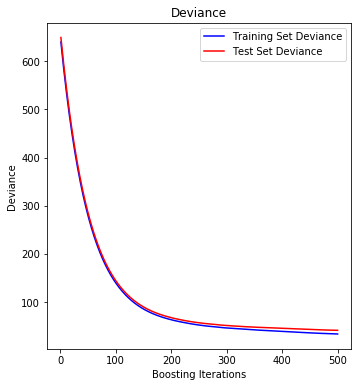

In [50]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(500) + 1, model.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(500) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [51]:
mean_squared_error(y_test, model.predict(X_test))

41.07448466229723

/Users/hannahstoik/PycharmProjects/smlproject/venv/lib/python/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


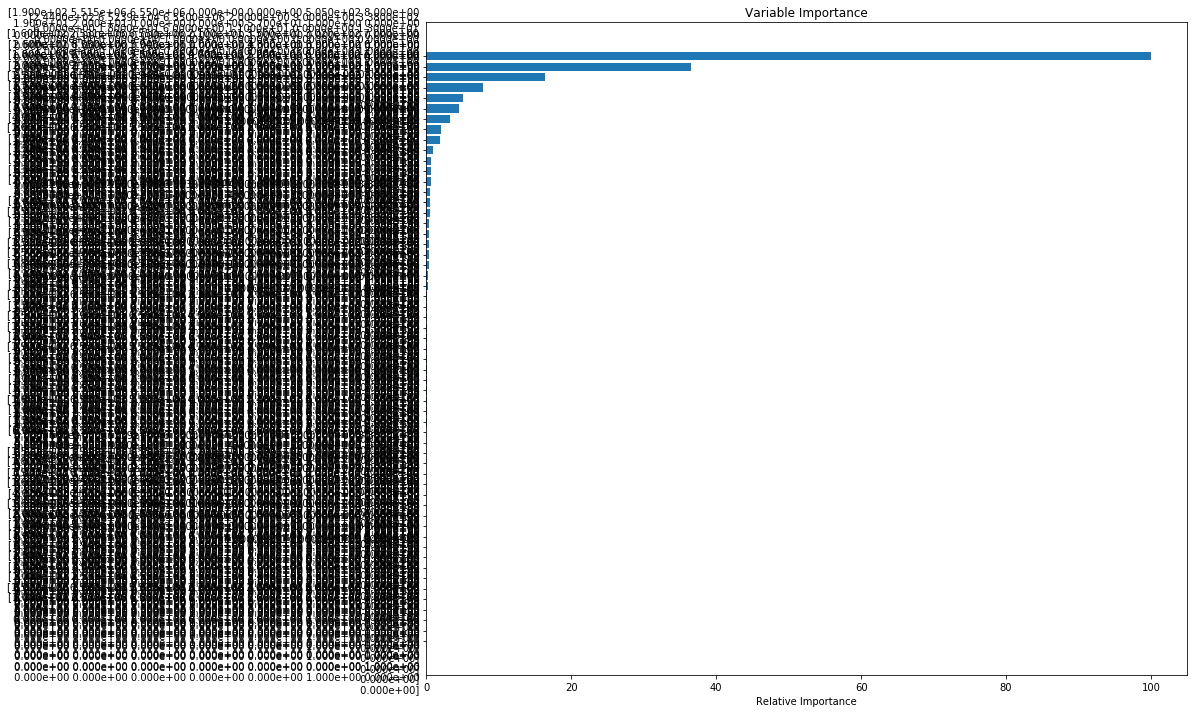

In [52]:
# doesn't work - elementwise comparison failed
# indices = np.array(list(range(len(features))))
# features = np.array(features)[indices.astype(int)]
# feature_importance = model.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0]) + .5
# plt.figure(figsize=(30, 12))
# plt.subplot(1, 2, 2)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, features[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()